# Determine price trends by district

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load csv into a dataframe
df = pd. read_csv("combine_updated2.csv")
df.head()

,Assessor Neighborhood,Assessed Land Value,Closed Roll Year
0,Alamo Square,356275.88,2007
1,Anza Vista,249759.91,2007
2,Balboa Terrace,308412.95,2007
3,Bayview,181096.93,2007
4,Bayview Heights,128157.54,2007


In [3]:
# List districts and neighbourhoods
Downtown = ["Chinatown", "Civic Center", "Financial District", "French Quarter", "Mid-Market", "Nob Hill", 
            "North Beach", "Mission Bay", "South of Market", "Telegraph Hill", "Tenderloin", "Union Square", 
            "Downtown","Van Ness/ Civic Center", "Downtown/Civic Center", "Financial District North", 
            "Financial District South", "South Beach"]
North_Downtown = ["Cow Hollow", "Fisherman's Wharf", "Marina", "Pacific Heights", "Presidio", "Russian Hill",
                  "Treasure Island", "Yerba Buena Island", "Treasure Island/YBI", "Presidio Heights", 
                  "Lake --The Presidio", "Yerba Buena", "North Waterfront"]
Outside_Lands = ["Forest Hill", "Ingleside", "Ingleside Terrace", "Ocean View", "Parkside", "Outer Richmond",  
                 "Seacliff", "Sea Cliff", "St. Francis Wood", "Inner Sunset", "West Portal", "Westwood Highlands", 
                 "Westwood Park", "Golden Gate Park", "Inner Richmond","Oceanview", "Outer Sunset", "Balboa Terrace",
                 "Central Richmond", "Lakeshore", "Lake Shore", "Monterey Heights", "Central Sunset", 
                 "Forest Hill Extension", "Golden Gate Heights", "Ingleside Heights", "Pine Lake Park", 
                 "Stonestown", "Lakeside", "Lake", "Inner Parkside", "Merced Heights", "Forest Knolls",
                 "Clarendon Heights", "Merced Manor", "Mount Davidson Manor", "Outer Parkside", "Park North",
                 "Sunnyside"]
Western_Addition = ["Alamo Square", "Anza Vista", "Cathedral Hill", "Cole Valley", "Corona Heights", "Duboce Triangle",
                    "Fillmore", "Haight Ashbury", "Hayes Valley", "Japantown", "Jordan Park/Laurel Heights", 
                    "Laurel Heights", "Lower Haight", "Western Addition", "Haight", "Parnassus/Ashbury Heights",
                    "Lower Pacific Heights", "Lone Mountain", "Panhandle"]
Southern = ["Bayview", "Hunters Point", "Bernal Heights", "Castro", "Croker Amazon", "Crocker Amazon", 
            "Diamond Heights", "Dogpatch", "Eureka Valley", "Excelsior", "Glen Park", "Mission", "Noe Valley", 
            "Mission Dolores","Outer Mission", "Portola", "Potrero Hill", "Visitacion Valley", "Castro/Upper Market", 
            "Upper Market", "Mission Terrace", "Bayview Heights", "Buena Vista", "Buena Vista Park", 
            "Eureka Valley/Dolores Heights", "Inner Mission", "Twin Peaks", "West of Twin Peaks", "Little Hollywood",
            "Midtown Terrace", "Miraloma Park", "Sherwood Forest", "Silver Terrace"]

In [4]:
# Create a new column called District
df["District"] = np.where(df["Assessor Neighborhood"].isin(Downtown),"Downtown", 
                             (np.where(df["Assessor Neighborhood"].isin(North_Downtown),"North Downtown",
                             (np.where(df["Assessor Neighborhood"].isin(Outside_Lands), "Outside Lands",
                             (np.where(df["Assessor Neighborhood"].isin(Western_Addition), "Western Addition",
                              np.where(df["Assessor Neighborhood"].isin(Southern), "Southern", ""))))))))

# rename columns
df = df.rename(columns = {"Assessed Land Value": "Home Price",
                          "Assessor Neighborhood": "Neighbourhood",
                          "Closed Roll Year": "Year"})

# reorder the dataframe
df = df[["Year", "Neighbourhood", "District", "Home Price"]]

df.head()

,Year,Neighbourhood,District,Home Price
0,2007,Alamo Square,Western Addition,356275.88
1,2007,Anza Vista,Western Addition,249759.91
2,2007,Balboa Terrace,Outside Lands,308412.95
3,2007,Bayview,Southern,181096.93
4,2007,Bayview Heights,Southern,128157.54


In [5]:
# Determine the averages by district
df2 = round(df.groupby(["Year", "District"]).mean(),2)
df2 = df2.unstack()
df2 = df2.reset_index()
df2.head()

Year Home Price                                          \
District         Downtown North Downtown Outside Lands   Southern   
0         2007  652180.18      452278.61     280375.83  204270.38   
1         2008  727469.90      495835.02     300637.22  221101.78   
2         2009  809943.65      523697.89     336988.45  233513.58   
3         2010  854158.96      544915.35     351032.10  236981.69   
4         2011  854572.13      577757.12     307855.77  245798.61   

                           
District Western Addition  
0               304877.86  
1               337734.84  
2               355257.04  
3               368659.09  
4               380131.06

## Plot the home price by district and by year

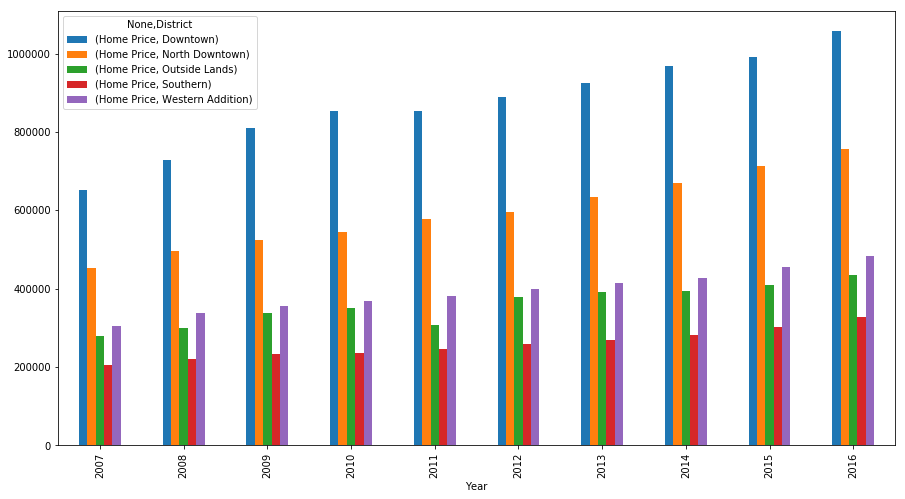

In [28]:
df2.plot.bar(x = "Year", figsize = (15, 8))

# Save plot
plt.savefig("../Images/home_price_district.svg")
plt.savefig("../Images/home_price_district.png")